In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from scipy import stats

# Create pandas dataframe 
df1 = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')

# Filter out "U" in the "Sex" column
df2 = df1[df1['Sex'] != 'U']

# Group 17 years and under 
df2['Age_group__at_arrest_'] = df2['Age_group__at_arrest_'].replace('Aged 17 years and younger', 'Aged 17 years and under')
df2['Youth_at_arrest__under_18_years'] = df2['Youth_at_arrest__under_18_years'].replace('Youth (aged 17 and younger)', 'Youth (aged 17 years and under)')

# Save the updated dataset
df2.to_csv('updated_arrests.csv', index=False)

# Group the 65 years and older
df2['Age_group__at_arrest_'] = df2['Age_group__at_arrest_'].replace('Aged 65 years and older', 'Aged 65 and older')

# Save the updated dataset
df2.to_csv('updated_arrests.csv', index=False)

# Set the new dataframe
df = pd.read_csv('updated_arrests.csv')

subset = df[['PersonID', 'StripSearch','Sex', 'Perceived_Race','Age_group__at_arrest_','Youth_at_arrest__under_18_years','ArrestLocDiv']].dropna()
strip_search_sum = subset.groupby(['PersonID','Sex', 'Perceived_Race', 'Age_group__at_arrest_','Youth_at_arrest__under_18_years'])['StripSearch'].agg('sum').reset_index(name='strip_search_sum').dropna()
strip_search_sum = strip_search_sum.sort_values(by='strip_search_sum', ascending=False)

print(strip_search_sum)

<ipython-input-1-2b239a4af108>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age_group__at_arrest_'] = df2['Age_group__at_arrest_'].replace('Aged 17 years and younger', 'Aged 17 years and under')
<ipython-input-1-2b239a4af108>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Youth_at_arrest__under_18_years'] = df2['Youth_at_arrest__under_18_years'].replace('Youth (aged 17 and younger)', 'Youth (aged 17 years and under)')
<ipython-input-1-2b239a4af108>:24: SettingWithCopyWarning: 
A value is t

       PersonID Sex     Perceived_Race Age_group__at_arrest_  \
4295     303892   M         Indigenous   Aged 35 to 44 years   
40790    337011   M              White   Aged 25 to 34 years   
25913    323471   M              Black   Aged 25 to 34 years   
27039    324487   M              Black   Aged 45 to 54 years   
17318    315676   M              White   Aged 18 to 24 years   
...         ...  ..                ...                   ...   
14675    313272   F              White   Aged 45 to 54 years   
14676    313273   M  Unknown or Legacy   Aged 45 to 54 years   
14677    313274   M              Black   Aged 25 to 34 years   
14678    313275   M         Indigenous   Aged 45 to 54 years   
41153    337346   M              White   Aged 18 to 24 years   

      Youth_at_arrest__under_18_years  strip_search_sum  
4295                      Not a youth                13  
40790                     Not a youth                12  
25913                     Not a youth                12  

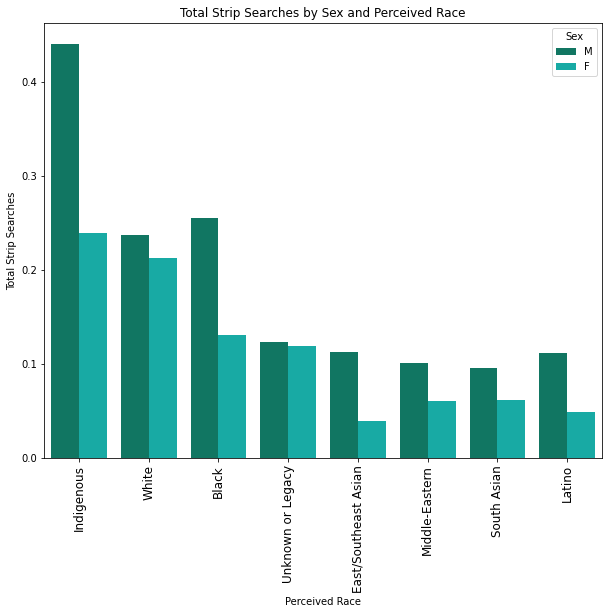

In [2]:
# Create a larger figure
plt.figure(figsize=(10, 8))

# Create the bar plot 
ax = sns.barplot(x= "Perceived_Race", y= "strip_search_sum", hue= "Sex", data = strip_search_sum, palette =['#00876c','#00c2ba'],ci=None)
plt.xticks(rotation=90, fontsize=12)

# Set the title of the plot
ax.set_title("Total Strip Searches by Sex and Perceived Race")

# Add labels to the axes
ax.set_xlabel("Perceived Race")
ax.set_ylabel("Total Strip Searches")

# Show the plot
plt.show()

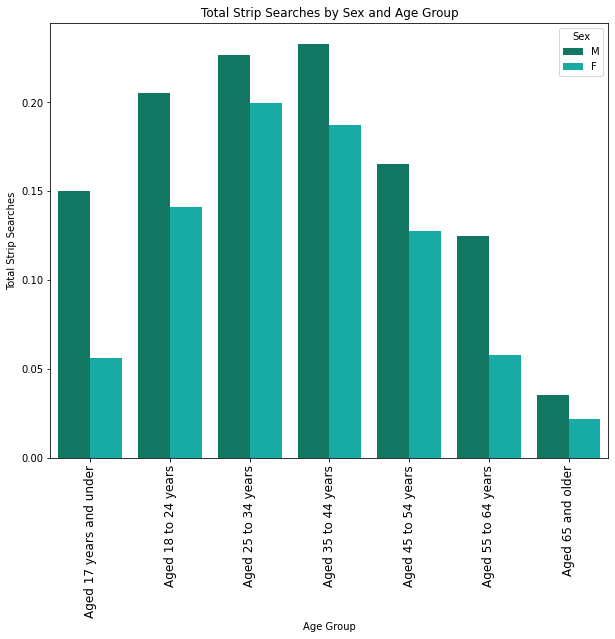

In [3]:
strip_search_sum = strip_search_sum.sort_values("Age_group__at_arrest_")
# Create a larger figure
plt.figure(figsize=(10, 8))

# Create the bar plot 
ax = sns.barplot(x= "Age_group__at_arrest_", y= "strip_search_sum", hue= "Sex", data = strip_search_sum, palette =['#00876c','#00c2ba'],ci=None)
plt.xticks(rotation=90, fontsize=12)

# Set the title of the plot
ax.set_title("Total Strip Searches by Sex and Age Group")

# Add labels to the axes
ax.set_xlabel("Age Group")
ax.set_ylabel("Total Strip Searches")

# Show the plot
plt.show()

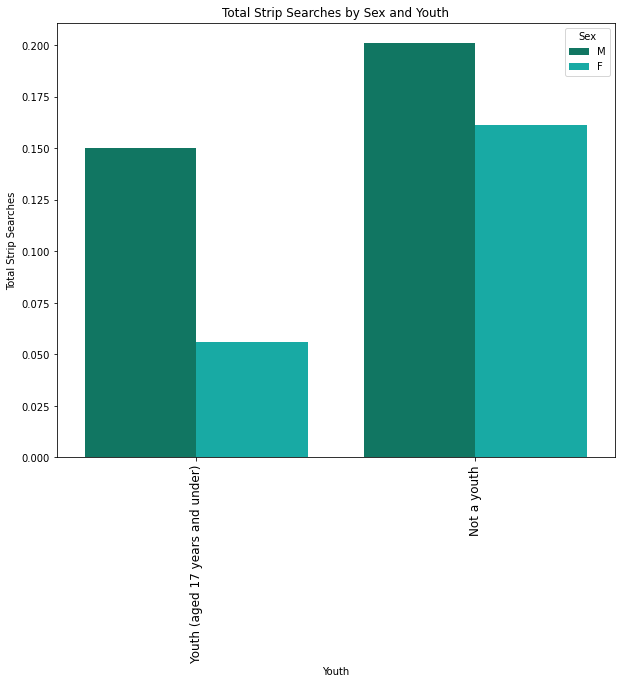

In [4]:
# Create a larger figure
plt.figure(figsize=(10, 8))

# Create the bar plot 
ax = sns.barplot(x= "Youth_at_arrest__under_18_years", y= "strip_search_sum", hue= "Sex", data = strip_search_sum, palette =['#00876c','#00c2ba'], ci=None)
plt.xticks(rotation=90, fontsize=12)

# Set the title of the plot
ax.set_title("Total Strip Searches by Sex and Youth")

# Add labels to the axes
ax.set_xlabel("Youth")
ax.set_ylabel("Total Strip Searches")

# Show the plot
plt.show()

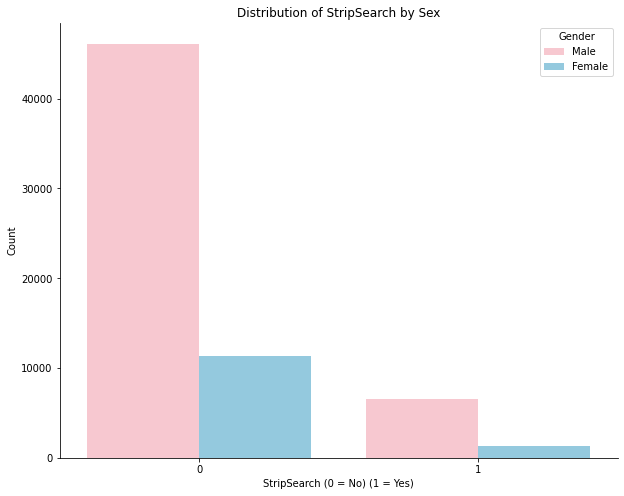

In [5]:
# Visualizing the variable "Stripsearch" vs "counts"
plt.figure(figsize=(10, 8))
sns.countplot(x = "StripSearch", hue = 'Sex', data=df, palette=['pink','skyblue'])
plt.xlabel("StripSearch (0 = No) (1 = Yes)")
plt.ylabel("Count")
plt.title("Distribution of StripSearch by Sex")
plt.legend(title="Gender", labels=["Male", "Female"])
sns.despine()
plt.show()


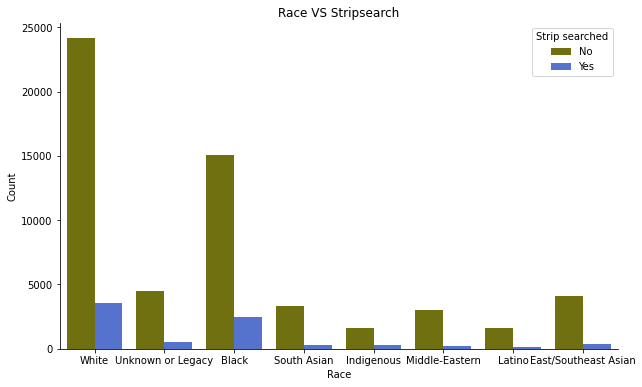

In [6]:
# Visualizing "Race" vs "stripsearch"
def Race_vs_Stripsearch():
    plt.figure(figsize=(10, 6))
    sns.countplot(x= "Perceived_Race", hue= "StripSearch", data= df, palette= ['olive','royalblue'])
    plt.xlabel("Race")
    plt.ylabel("Count")
    plt.title("Race VS Stripsearch")
    plt.legend(title="Strip searched", labels=["No", "Yes"])
    sns.despine()
    plt.show()
# Display the chart
Race_vs_Stripsearch()


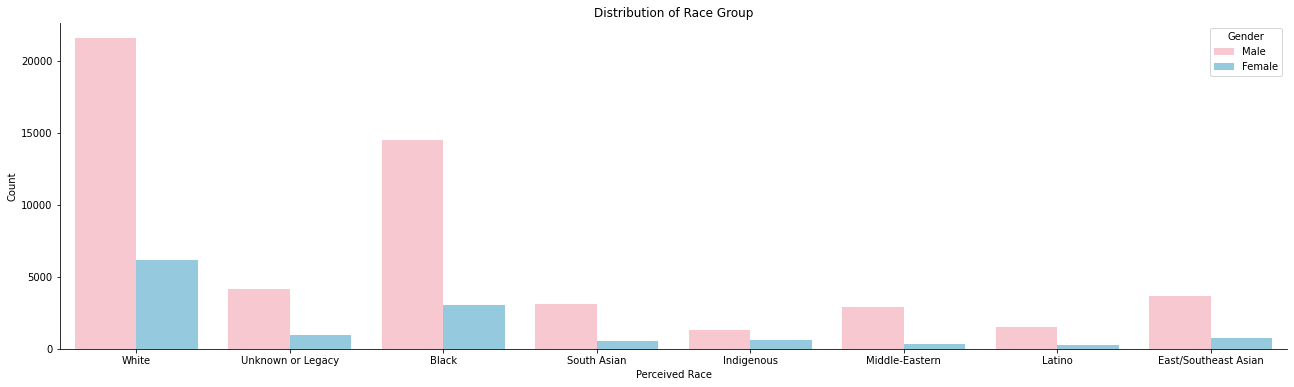

In [7]:
# Visualizing the variable "Race" vs "counts"

def Race_vs_counts():
    plt.figure(figsize=(22, 6))
    sns.countplot(x="Perceived_Race", hue="Sex", data=df, palette=['pink','skyblue'])
    plt.xlabel("Perceived Race")
    plt.ylabel("Count")
    plt.title("Distribution of Race Group")
    plt.legend(title="Gender", labels=["Male", "Female"])
    sns.despine()
    plt.show()

Race_vs_counts()

In [8]:
from tabulate import tabulate

# Group by "Sex" and "strip search"
grouped = df.groupby(['Sex', 'StripSearch'])

# Descriptive statistics
desc_stats = grouped.size().reset_index(name='count')
desc_stats['percentage'] = desc_stats['count'] / desc_stats['count'].sum() * 100
desc_stats['percentage'] = desc_stats['percentage'].apply(lambda x: '{:.2f}%'.format(x))  # format percentage column

# Print the table
title = "Strip Searches by Sex"
print(tabulate(desc_stats, headers='keys', tablefmt='simple', showindex=False, floatfmt='.2f'))


Sex      StripSearch    count  percentage
-----  -------------  -------  ------------
F                  0    11334  17.37%
F                  1     1283  1.97%
M                  0    46132  70.68%
M                  1     6518  9.99%


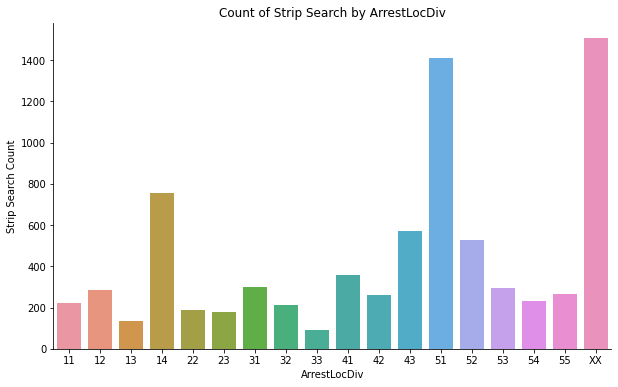

In [9]:
# Visualizing "ArrestLocDiv" and "StripSearch"
grouped = df.groupby(['ArrestLocDiv', 'StripSearch'])['StripSearch'].agg('count')

# Reset index and rename column
grouped = grouped.reset_index(name='count')

# Filter for StripSearch = 1
grouped = grouped[grouped['StripSearch'] == 1]

# Print the chart 
plt.figure(figsize=(10, 6))
sns.barplot(x='ArrestLocDiv', y='count', data=grouped)
plt.title('Count of Strip Search by ArrestLocDiv')
plt.xlabel('ArrestLocDiv')
plt.ylabel('Strip Search Count')
sns.despine()
plt.show()

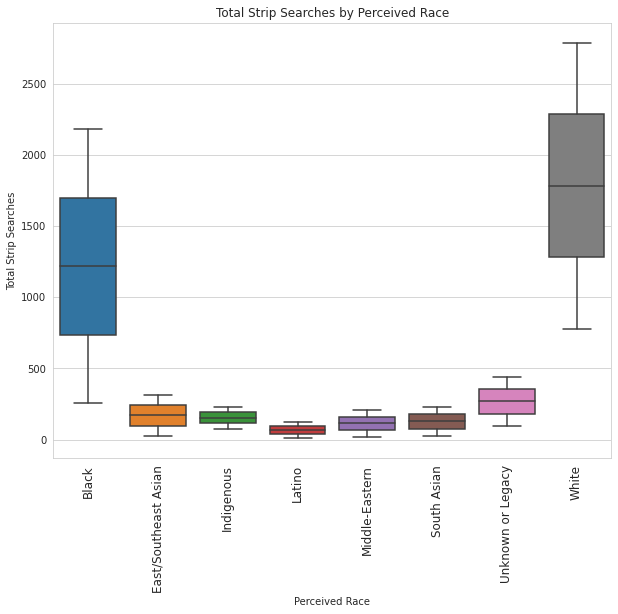

In [10]:
import matplotlib.pyplot as plt

# Group the data by Perceived_Race and StripSearch columns and calculate the sum

race_sum = subset.groupby(['Sex', 'Perceived_Race'])['StripSearch'].agg('sum').reset_index(name='race_sum').dropna()


sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 8))

# Create the bar plot using seaborn
ax = sns.boxplot(data = race_sum, x = "Perceived_Race", y="race_sum")
plt.xticks(rotation=90, fontsize=12)

# Set the title of the plot
ax.set_title("Total Strip Searches by Perceived Race")

# Add labels to the axes
ax.set_xlabel("Perceived Race")
ax.set_ylabel("Total Strip Searches")

# Show the plot
plt.show()


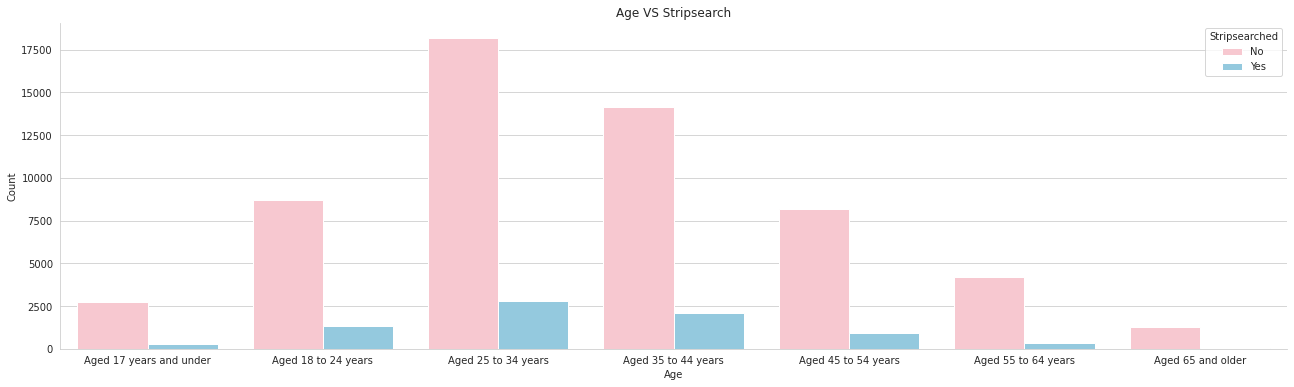

In [11]:
# Visualizing the variable "Age" vs "stripsearch"
df = df.sort_values("Age_group__at_arrest_")
plt.figure(figsize=(22, 6))
sns.countplot(x="Age_group__at_arrest_", hue="StripSearch", data=df, palette=['pink','skyblue'])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age VS Stripsearch")
plt.legend(title="Stripsearched", labels=["No", "Yes"])
sns.despine()
plt.show()


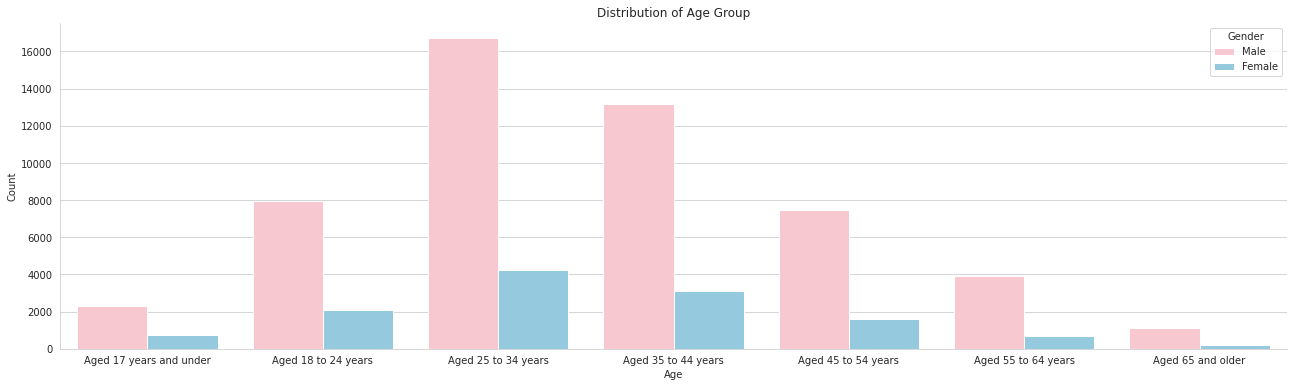

In [12]:
# Visualizing the variable "Age" vs "counts"

def Age_vs_counts():
    plt.figure(figsize=(22, 6))
    sns.countplot(x="Age_group__at_arrest_", hue="Sex", data=df, palette=['pink','skyblue'])
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.title("Distribution of Age Group")
    plt.legend(title="Gender", labels=["Male", "Female"])
    sns.despine()
    plt.show()
    
Age_vs_counts()

In [13]:
# select the subset of columns we need and drop missing values
subset = df[['Perceived_Race', 'StripSearch']].dropna()

# create a cross-tabulation of the variables
table = pd.crosstab(subset['Perceived_Race'], subset['StripSearch'], normalize='index') * 100

# format the percentages
table = table.applymap(lambda x: '{:.2f}%'.format(x))
# rename the columns to "No" and "Yes"
table.columns = ['No', 'Yes']
# print the table
print(table)

                          No     Yes
Perceived_Race                      
Black                 86.11%  13.89%
East/Southeast Asian  92.28%   7.72%
Indigenous            84.18%  15.82%
Latino                92.53%   7.47%
Middle-Eastern        92.96%   7.04%
South Asian           92.89%   7.11%
Unknown or Legacy     89.39%  10.61%
White                 87.13%  12.87%


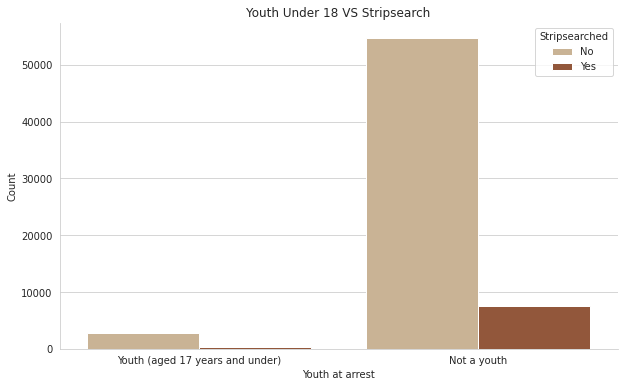

In [14]:
# Combine the two aged 17 years and under into one category  
df['Youth_at_arrest__under_18_years'] = df['Youth_at_arrest__under_18_years'].replace('Youth (aged 17 and younger)', 'Youth (aged 17 years and under)')

# Visualiza the chart
def Youth_at_arrest__under_18_years_vs_Stripsearch():
    plt.figure(figsize=(10, 6))
    sns.countplot(x="Youth_at_arrest__under_18_years", hue="StripSearch", data=df, palette=['tan','sienna'])
    plt.ylabel("Count")
    plt.xlabel("Youth at arrest")
    plt.title("Youth Under 18 VS Stripsearch")
    plt.legend(title="Stripsearched", labels=["No", "Yes"])
    sns.despine()
    plt.show()

Youth_at_arrest__under_18_years_vs_Stripsearch()


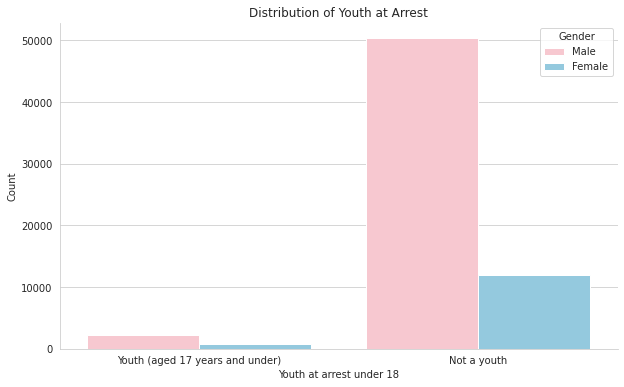

In [15]:
# Visualizing the variable "Age" vs "counts"

def Age_vs_counts():
    plt.figure(figsize=(10, 6))
    sns.countplot(x="Youth_at_arrest__under_18_years", hue="Sex", data=df, palette=['pink','skyblue'])
    plt.xlabel("Youth at arrest under 18")
    plt.ylabel("Count")
    plt.title("Distribution of Youth at Arrest")
    plt.legend(title="Gender", labels=["Male", "Female"])
    sns.despine()
    plt.show()

Age_vs_counts()

In [16]:
# Pulled out people who has been strip searched 
searched_df = df[df['StripSearch'] == 1]
searched_df
# Find the frequency of each age group that has been strip searched 
age_freq = searched_df.groupby('Age_group__at_arrest_')['Age_group__at_arrest_'].count()
age_freq

Age_group__at_arrest_
Aged 17 years and under     280
Aged 18 to 24 years        1349
Aged 25 to 34 years        2771
Aged 35 to 44 years        2098
Aged 45 to 54 years         905
Aged 55 to 64 years         362
Aged 65 and older            36
Name: Age_group__at_arrest_, dtype: int64

In [17]:
clean_sub = df[['PersonID', 'StripSearch','Sex', 'Perceived_Race','Age_group__at_arrest_','Youth_at_arrest__under_18_years']].dropna()

# group by person ID and sum up the number of times been strip searched
Sum_id = clean_sub.groupby(['PersonID','Sex','Perceived_Race'])['StripSearch'].sum().reset_index(name='StripSearch')

# sort Sum_id dataframe in descending order based on StripSearch column
Sum_id_sorted = Sum_id.sort_values('StripSearch', ascending=False)

# print the results
print(Sum_id_sorted)

# create the two-way ANOVA model
model = ols('StripSearch ~ C(Perceived_Race) + C(Sex) + C(Perceived_Race):C(Sex)', data=Sum_id).fit()
# print(model)
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

       PersonID Sex Perceived_Race  StripSearch
4210     303892   M     Indigenous           13
40033    337011   M          White           12
25407    323471   M          Black           12
26511    324487   M          Black           11
16981    315676   M          White           10
...         ...  ..            ...          ...
14419    313303   M          White            0
14420    313304   M          Black            0
14421    313305   M          White            0
14422    313306   M          White            0
40392    337346   M          White            0

[40393 rows x 4 columns]
                                sum_sq       df          F         PR(>F)
C(Perceived_Race)           198.584238      7.0  72.893792  2.396116e-105
C(Sex)                       23.059903      1.0  59.251763   1.418850e-14
C(Perceived_Race):C(Sex)     17.456880      7.0   6.407851   1.473674e-07
Residual                  15714.126369  40377.0        NaN            NaN


In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# conduct Tukey's HSD for the Perceived Race variable
tukey_race = pairwise_tukeyhsd(endog=Sum_id['StripSearch'], groups=Sum_id['Perceived_Race'], alpha=0.05)
print(tukey_race)

# conduct Tukey's HSD for the Sex variable
tukey_sex = pairwise_tukeyhsd(endog=Sum_id['StripSearch'], groups=Sum_id['Sex'], alpha=0.05)
print(tukey_sex)

# conduct Tukey's HSD for the interaction effect between Perceived Race and Sex
tukey_int = pairwise_tukeyhsd(endog=Sum_id['StripSearch'], groups=Sum_id['Perceived_Race'].astype(str) + Sum_id['Sex'].astype(str), alpha=0.05)
print(tukey_int)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
               Black East/Southeast Asian  -0.1382  0.001 -0.1756 -0.1009   True
               Black           Indigenous   0.1373  0.001  0.0684  0.2061   True
               Black               Latino  -0.1349  0.001 -0.1909 -0.0788   True
               Black       Middle-Eastern  -0.1406  0.001  -0.184 -0.0973   True
               Black          South Asian   -0.147  0.001 -0.1872 -0.1068   True
               Black    Unknown or Legacy  -0.1151  0.001 -0.1493 -0.0808   True
               Black                White  -0.0013    0.9 -0.0255   0.023  False
East/Southeast Asian           Indigenous   0.2755  0.001  0.2018  0.3492   True
East/Southeast Asian               Latino   0.0034    0.9 -0.0586  0.0653  False
East/Southeast Asian       M

<Figure size 576x432 with 0 Axes>

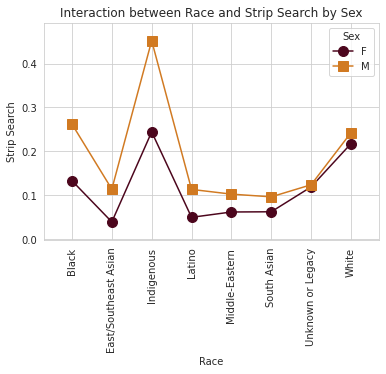

In [19]:
from statsmodels.graphics.factorplots import interaction_plot
# create an interaction plot
fig = plt.figure(figsize=(8, 6))
sns.set_palette(['red', 'blue'])

interaction_plot(x=Sum_id_sorted['Perceived_Race'],
                 trace=Sum_id_sorted['Sex'], 
                 response=Sum_id_sorted['StripSearch'],
                 colors=['#4c061d','#d17a22'], 
                 markers=['o', 's'], 
                 ms=10)
plt.xticks(rotation=90)
plt.xlabel('Race')
plt.ylabel('Strip Search')
plt.title('Interaction between Race and Strip Search by Sex')
plt.show()
#,'green','yellow','purple','skyblue','olive','black'
#, 'D', '^', 'v', '*', 'X', '+'

In [20]:
#one-way ANOVA
Sum_id_age = clean_sub.groupby(['PersonID','Age_group__at_arrest_'])['StripSearch'].sum().reset_index(name='StripSearch')

model = ols('StripSearch ~ C(Age_group__at_arrest_)', data=Sum_id_age).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                sum_sq       df          F        PR(>F)
C(Age_group__at_arrest_)     97.043627      6.0  35.496419  4.343393e-43
Residual                  17391.243210  38168.0        NaN           NaN


In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=Sum_id_age['StripSearch'],
                          groups=Sum_id_age['Age_group__at_arrest_'],
                          alpha=0.05)

# display results
print(tukey)

               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
         group1                group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------
Aged 17 years and under Aged 18 to 24 years   0.0718  0.001  0.0218  0.1219   True
Aged 17 years and under Aged 25 to 34 years   0.1049  0.001  0.0575  0.1523   True
Aged 17 years and under Aged 35 to 44 years   0.1103  0.001  0.0616  0.1589   True
Aged 17 years and under Aged 45 to 54 years   0.0359 0.3816 -0.0156  0.0873  False
Aged 17 years and under Aged 55 to 64 years  -0.0148    0.9 -0.0715  0.0418  False
Aged 17 years and under   Aged 65 and older  -0.1005 0.0015 -0.1756 -0.0254   True
    Aged 18 to 24 years Aged 25 to 34 years    0.033  0.026  0.0023  0.0638   True
    Aged 18 to 24 years Aged 35 to 44 years   0.0384 0.0095  0.0057  0.0711   True
    Aged 18 to 24 years Aged 45 to 54 years   -0.036 0.0595 -0.0728  0.0008  False
    

In [22]:
Sum_id = clean_sub.groupby(['PersonID','Sex','Perceived_Race'])['StripSearch'].sum().reset_index(name='StripSearch')
#two-sided t-test
male_search = Sum_id[Sum_id['Sex'] == 'M']['StripSearch'].values
female_search = Sum_id[Sum_id['Sex'] == 'F']['StripSearch'].values

# Conduct t-test
t_stat, p_value = stats.ttest_ind(male_search, female_search)

# Print results
print("t-statistic = ", t_stat)
print("p-value = ", p_value)

t-statistic =  5.87888675750744
p-value =  4.162739318145988e-09


In [23]:
# One-sided, greater than test
t_stat, p_value = stats.ttest_ind(male_search, female_search, alternative='greater')

print("t-statistic = ", t_stat)
print("p-value = ", p_value)

t-statistic =  5.87888675750744
p-value =  2.081369659072994e-09


In [24]:
# One-sided, less than test
t_stat, p_value = stats.ttest_ind(male_search, female_search, alternative='less')
print("t-statistic = ", t_stat)
print("p-value = ", p_value)

t-statistic =  5.87888675750744
p-value =  0.9999999979186304


In [25]:
# Two-sided test
statistic, pvalue_twosided = stats.ttest_ind(male_search, female_search)

# One-sided, greater than test
statistic, pvalue_greater = stats.ttest_ind(male_search, female_search, alternative='greater')

# One-sided, less than test
statistic, pvalue_less = stats.ttest_ind(male_search, female_search, alternative='less')

print(pvalue_twosided == pvalue_greater * 2)

True


In [26]:
print(pvalue_greater + pvalue_less == 1)

True


In [27]:
print(pvalue_less + pvalue_twosided / 2 == 1)

True


In [28]:
# Calculate means and standard errors
mean_male = male_search.mean()
mean_female = female_search.mean()
se_male = male_search.std() / np.sqrt(len(male_search))
se_female = female_search.std() / np.sqrt(len(female_search))

# Calculate standard error of the difference
se_diff = np.sqrt(se_male**2 + se_female**2)

# Calculate degrees of freedom
df = len(male_search) + len(female_search) - 2

# Set the confidence level
alpha = 0.05

# Calculate the t-value for the desired confidence level and degrees of freedom
t_crit = abs(stats.t.ppf(alpha/2, df))

# Calculate the margin of error
moe = t_crit * se_diff

# Calculate the confidence interval
ci_lower = (mean_male - mean_female) - moe
ci_upper = (mean_male - mean_female) + moe

print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

95% Confidence Interval: (0.03, 0.06)


In [29]:
# Define the margin of equivalence (MOE)
MOE = 0.5  # or some other value of interest

# Conduct the two one-sided t-tests
t_left = (np.mean(male_search) - np.mean(female_search) - MOE) / np.sqrt((np.var(male_search) + np.var(female_search)) / len(male_search))
t_right = (np.mean(male_search) - np.mean(female_search) + MOE) / np.sqrt((np.var(male_search) + np.var(female_search)) / len(male_search))

# Calculate the p-value for the TOST
p_tost = 2 * stats.t.cdf(min(t_left, t_right), df=(len(male_search) + len(female_search) - 2))  

# Check if the p-value is less than the significance level alpha
alpha = 0.05
if p_tost < alpha:
    print("The null hypothesis of equivalence is rejected.")
else:
    print("The null hypothesis of equivalence is not rejected.")

The null hypothesis of equivalence is rejected.


In [30]:
white_search = Sum_id[Sum_id['Perceived_Race'] == 'Black']['StripSearch'].values
black_search = Sum_id[Sum_id['Perceived_Race'] == 'White']['StripSearch'].values

# Conduct t-test
t_stat, p_value = stats.ttest_ind(white_search, black_search)

# Print results
print("t-statistic = ", t_stat)
print("p-value = ", p_value)

t-statistic =  0.1404107406542711
p-value =  0.8883365891341579


In [31]:
# One-sided, greater than test
t_stat, p_value = stats.ttest_ind(white_search, black_search, alternative='greater')

print("t-statistic = ", t_stat)
print("p-value = ", p_value)

t-statistic =  0.1404107406542711
p-value =  0.44416829456707896


In [32]:
# One-sided, less than test
t_stat, p_value = stats.ttest_ind(white_search, black_search, alternative='less')
print("t-statistic = ", t_stat)
print("p-value = ", p_value)

t-statistic =  0.1404107406542711
p-value =  0.555831705432921


In [33]:
# Two-sided test
statistic, pvalue_twosided = stats.ttest_ind(white_search, black_search)

# One-sided, greater than test
statistic, pvalue_greater = stats.ttest_ind(white_search, black_search, alternative='greater')

# One-sided, less than test
statistic, pvalue_less = stats.ttest_ind(white_search, black_search, alternative='less')

print(pvalue_twosided == pvalue_greater * 2)

True


In [34]:
print(pvalue_greater + pvalue_less == 1)

True


In [35]:
print(pvalue_less + pvalue_twosided / 2 == 1)

True


In [36]:
# Calculate means and standard errors
mean_wh = white_search.mean()
mean_bla = black_search.mean()
se_wh = white_search.std() / np.sqrt(len(white_search))
se_bla = black_search.std() / np.sqrt(len(black_search))

# Calculate standard error of the difference
se_diff = np.sqrt(se_wh**2 + se_bla**2)

# Calculate degrees of freedom
df = len(white_search) + len(black_search) - 2

# Set the confidence level
alpha = 0.05

# Calculate the t-value for the desired confidence level and degrees of freedom
t_crit = abs(stats.t.ppf(alpha/2, df))

# Calculate the margin of error
moe = t_crit * se_diff

# Calculate the confidence interval
ci_lower = (mean_wh - mean_bla) - moe
ci_upper = (mean_wh - mean_bla) + moe

print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")


95% Confidence Interval: (-0.02, 0.02)


In [39]:
# Define the margin of equivalence (MOE)
MOE = 0.5  # or some other value of interest

# Conduct the two one-sided t-tests
t_left = (np.mean(white_search) - np.mean(black_search) - MOE) / np.sqrt((np.var(white_search) + np.var(black_search)) / len(white_search))
t_right = (np.mean(white_search) - np.mean(black_search) + MOE) / np.sqrt((np.var(white_search) + np.var(black_search)) / len(white_search))

# Calculate the p-value for the TOST
p_tost = 2 * stats.t.cdf(min(t_left, t_right), df=(len(white_search) + len(black_search) - 2))  

# Check if the p-value is less than the significance level alpha
alpha = 0.05
if p_tost < alpha:
    print("The null hypothesis of equivalence is rejected.")
else:
    print("The null hypothesis of equivalence is not rejected.")


The null hypothesis of equivalence is rejected.


In [40]:
Sum_id_youth = clean_sub.groupby(['PersonID','Youth_at_arrest__under_18_years'])['StripSearch'].sum().reset_index(name='StripSearch')
#two-sided t-test
youth_search = Sum_id_youth[Sum_id_youth['Youth_at_arrest__under_18_years'] != 'Not a youth']['StripSearch'].values
noty_search = Sum_id_youth[Sum_id_youth['Youth_at_arrest__under_18_years'] == 'Not a youth']['StripSearch'].values

# Conduct t-test
t_stat, p_value = stats.ttest_ind(youth_search, noty_search)

# Print results
print("t-statistic = ", t_stat)
print("p-value = ", p_value)


t-statistic =  -5.034960394701557
p-value =  4.801627170247833e-07


In [41]:
# One-sided, greater than test
t_stat, p_value = stats.ttest_ind(youth_search, noty_search, alternative='greater')

print("t-statistic = ", t_stat)
print("p-value = ", p_value)

t-statistic =  -5.034960394701557
p-value =  0.9999997599186414


In [42]:
# One-sided, less than test
t_stat, p_value = stats.ttest_ind(youth_search, noty_search, alternative='less')
print("t-statistic = ", t_stat)
print("p-value = ", p_value)

t-statistic =  -5.034960394701557
p-value =  2.4008135851239164e-07


In [43]:
# Two-sided test
statistic, pvalue_twosided = stats.ttest_ind(youth_search, noty_search)

# One-sided, greater than test
statistic, pvalue_greater = stats.ttest_ind(youth_search, noty_search, alternative='greater')

# One-sided, less than test
statistic, pvalue_less = stats.ttest_ind(youth_search, noty_search, alternative='less')

print(pvalue_twosided == pvalue_greater * 2)

False


In [44]:
print(pvalue_greater + pvalue_less == 1)

False


In [ ]:
print(pvalue_less + pvalue_twosided / 2 == 1)

False


In [45]:
# Calculate means and standard errors
mean_youth = youth_search.mean()
mean_noty = noty_search.mean()
se_youth = youth_search.std() / np.sqrt(len(youth_search))
se_noty = noty_search.std() / np.sqrt(len(noty_search))

# Calculate standard error of the difference
se_diff = np.sqrt(se_youth**2 + se_noty**2)

# Calculate degrees of freedom
df = len(youth_search) + len(noty_search) - 2

# Set the confidence level
alpha = 0.05

# Calculate the t-value for the desired confidence level and degrees of freedom
t_crit = abs(stats.t.ppf(alpha/2, df))

# Calculate the margin of error
moe = t_crit * se_diff

# Calculate the confidence interval
ci_lower = (mean_youth - mean_noty) - moe
ci_upper = (mean_youth - mean_noty) + moe

print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")


95% Confidence Interval: (-0.10, -0.06)


In [46]:
# Define the margin of equivalence (MOE)
MOE = 0.5  # or some other value of interest

# Conduct the two one-sided t-tests
t_left = (np.mean(youth_search) - np.mean(noty_search) - MOE) / np.sqrt((np.var(youth_search) + np.var(noty_search)) / len(youth_search))
t_right = (np.mean(youth_search) - np.mean(noty_search) + MOE) / np.sqrt((np.var(youth_search) + np.var(noty_search)) / len(youth_search))

# Calculate the p-value for the TOST
p_tost = 2 * stats.t.cdf(min(t_left, t_right), df=(len(youth_search) + len(noty_search) - 2))  

# Check if the p-value is less than the significance level alpha
alpha = 0.05
if p_tost < alpha:
    print("The null hypothesis of equivalence is rejected.")
else:
    print("The null hypothesis of equivalence is not rejected.")


The null hypothesis of equivalence is rejected.


In [48]:
# Two-sided t-test
yoage_search = Sum_id_age[Sum_id_age['Age_group__at_arrest_'] == 'Aged 18 to 24 years']['StripSearch'].values
midage_search = Sum_id_age[Sum_id_age['Age_group__at_arrest_'] == 'Aged 35 to 44 years']['StripSearch'].values

# Conduct t-test
t_stat, p_value = stats.ttest_ind(yoage_search, midage_search)

# Print results
print("t-statistic = ", t_stat)
print("p-value = ", p_value)

t-statistic =  -3.2544966653608
p-value =  0.0011384330855313497


In [49]:
# One-sided, greater than test
t_stat, p_value = stats.ttest_ind(yoage_search, midage_search, alternative='greater')

print("t-statistic = ", t_stat)
print("p-value = ", p_value)

t-statistic =  -3.2544966653608
p-value =  0.9994307834572344


In [50]:
# One-sided, less than test
t_stat, p_value = stats.ttest_ind(yoage_search, midage_search, alternative='less')
print("t-statistic = ", t_stat)
print("p-value = ", p_value)

t-statistic =  -3.2544966653608
p-value =  0.0005692165427656748


In [51]:
# Two-sided test
statistic, pvalue_twosided = stats.ttest_ind(yoage_search, midage_search)

# One-sided, greater than test
statistic, pvalue_greater = stats.ttest_ind(yoage_search, midage_search, alternative='greater')

# One-sided, less than test
statistic, pvalue_less = stats.ttest_ind(yoage_search, midage_search, alternative='less')

print(pvalue_twosided == pvalue_greater * 2)

False


In [52]:
print(pvalue_greater + pvalue_less == 1)

True


In [ ]:
print(pvalue_less + pvalue_twosided / 2 == 1)

False


In [53]:
# Calculate means and standard errors
mean_yoage = yoage_search.mean()
mean_midage = midage_search.mean()
se_yoage = yoage_search.std() / np.sqrt(len(yoage_search))
se_midage = midage_search.std() / np.sqrt(len(midage_search))

# Calculate standard error of the difference
se_diff = np.sqrt(se_yoage**2 + se_midage**2)

# Calculate degrees of freedom
df = len(yoage_search) + len(midage_search) - 2

# Set the confidence level
alpha = 0.05

# Calculate the t-value for the desired confidence level and degrees of freedom
t_crit = abs(stats.t.ppf(alpha/2, df))

# Calculate the margin of error
moe = t_crit * se_diff

# Calculate the confidence interval
ci_lower = (mean_yoage - mean_midage) - moe
ci_upper = (mean_yoage - mean_midage) + moe

print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")


95% Confidence Interval: (-0.06, -0.02)


In [54]:
# Define the margin of equivalence (MOE)
MOE = 0.5  # or some other value of interest

# Conduct the two one-sided t-tests
t_left = (np.mean(yoage_search) - np.mean(midage_search) - MOE) / np.sqrt((np.var(yoage_search) + np.var(midage_search)) / len(yoage_search))
t_right = (np.mean(yoage_search) - np.mean(midage_search) + MOE) / np.sqrt((np.var(yoage_search) + np.var(midage_search)) / len(yoage_search))

# Calculate the p-value for the TOST
p_tost = 2 * stats.t.cdf(min(t_left, t_right), df=(len(yoage_search) + len(midage_search) - 2))  

# Check if the p-value is less than the significance level alpha
alpha = 0.05
if p_tost < alpha:
    print("The null hypothesis of equivalence is rejected.")
else:
    print("The null hypothesis of equivalence is not rejected.")


The null hypothesis of equivalence is rejected.


In [55]:
#two-sided t-test
black_search = Sum_id[Sum_id['Perceived_Race'] == 'Black']['StripSearch'].values
nonblack_search = Sum_id[Sum_id['Perceived_Race'] != 'Black']['StripSearch'].values

# Conduct t-test
t_stat, p_value = stats.ttest_ind(black_search, nonblack_search)

# Print results
print("t-statistic = ", t_stat)
print("p-value = ", p_value)

t-statistic =  8.327490167962049
p-value =  8.513868786736763e-17


In [56]:
# One-sided, greater than test
t_stat, p_value = stats.ttest_ind(black_search, nonblack_search, alternative='greater')

print("t-statistic = ", t_stat)
print("p-value = ", p_value)

t-statistic =  8.327490167962049
p-value =  4.2569343933683817e-17


In [57]:
# One-sided, less than test
t_stat, p_value = stats.ttest_ind(black_search, nonblack_search, alternative='less')
print("t-statistic = ", t_stat)
print("p-value = ", p_value)

t-statistic =  8.327490167962049
p-value =  0.9999999999999999


In [58]:
# Two-sided test
statistic, pvalue_twosided = stats.ttest_ind(black_search, nonblack_search)

# One-sided, greater than test
statistic, pvalue_greater = stats.ttest_ind(black_search, nonblack_search, alternative='greater')

# One-sided, less than test
statistic, pvalue_less = stats.ttest_ind(black_search, nonblack_search, alternative='less')

print(pvalue_twosided == pvalue_greater * 2)

True


In [59]:
print(pvalue_greater + pvalue_less == 1)

False


In [60]:
print(pvalue_less + pvalue_twosided / 2 == 1)

False


In [61]:
# Calculate means and standard errors
mean_black = black_search.mean()
mean_nonblack = nonblack_search.mean()
se_black = black_search.std() / np.sqrt(len(black_search))
se_nonblack = nonblack_search.std() / np.sqrt(len(nonblack_search))

# Calculate standard error of the difference
se_diff = np.sqrt(se_black**2 + se_nonblack**2)

# Calculate degrees of freedom
df = len(black_search) + len(nonblack_search) - 2

# Set the confidence level
alpha = 0.05

# Calculate the t-value for the desired confidence level and degrees of freedom
t_crit = abs(stats.t.ppf(alpha/2, df))

# Calculate the margin of error
moe = t_crit * se_diff

# Calculate the confidence interval
ci_lower = (mean_black - mean_nonblack) - moe
ci_upper = (mean_black - mean_nonblack) + moe

print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")


95% Confidence Interval: (0.04, 0.07)


In [62]:
# Define the margin of equivalence (MOE)
MOE = 0.5  # or some other value of interest

# Conduct the two one-sided t-tests
t_left = (np.mean(black_search) - np.mean(nonblack_search) - MOE) / np.sqrt((np.var(black_search) + np.var(nonblack_search)) / len(black_search))
t_right = (np.mean(black_search) - np.mean(nonblack_search) + MOE) / np.sqrt((np.var(black_search) + np.var(nonblack_search)) / len(black_search))

# Calculate the p-value for the TOST
p_tost = 2 * stats.t.cdf(min(t_left, t_right), df=(len(black_search) + len(nonblack_search) - 2))  

# Check if the p-value is less than the significance level alpha
alpha = 0.05
if p_tost < alpha:
    print("The null hypothesis of equivalence is rejected.")
else:
    print("The null hypothesis of equivalence is not rejected.")


The null hypothesis of equivalence is rejected.


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


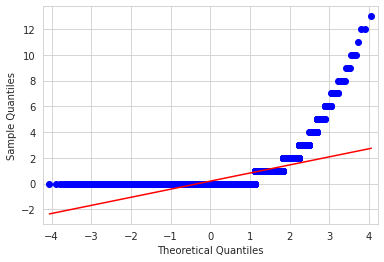

In [63]:
import matplotlib.pyplot as plt

qq_data = Sum_id['StripSearch']

# Create the QQ plot
sm.qqplot(qq_data, line='s')

# Show the plot
plt.show()

In [64]:
# Counting the number of male 
num_male = len(strip_search_sum[strip_search_sum['Sex'] == 'M'])
print("Number of male individuals:", num_male)

# Counting the number of female 
num_female = len(strip_search_sum[strip_search_sum['Sex'] == 'F'])
print("Number of female individuals:", num_female)

# Counting the total number 
num_total = num_male + num_female
print("Number of total individuals:", num_total)


Number of male individuals: 32845
Number of female individuals: 8309
Number of total individuals: 41154


In [65]:
# Aged 17 years and under
male_under_17 = strip_search_sum[(strip_search_sum['Sex'] == 'M') & (strip_search_sum['Age_group__at_arrest_'] == 'Aged 17 years and under')]
num_male_under_17 = len(male_under_17)
print("Number of males Aged 17 years and under:", num_male_under_17)

# Aged 18 to 24 years
male_18_24 = strip_search_sum[(strip_search_sum['Sex'] == 'M') & (strip_search_sum['Age_group__at_arrest_'] == 'Aged 18 to 24 years')]
num_male_18_24 = len(male_18_24)
print("Number of males aged 18 to 24 years:", num_male_18_24)

# Aged 25 to 34 years
male_25_34 = strip_search_sum[(strip_search_sum['Age_group__at_arrest_'] == 'Aged 25 to 34 years') & (strip_search_sum['Sex'] == 'M')]
num_male_25_34 = len(male_25_34)
print("Number of males aged 25 to 34 years:", num_male_25_34)

# Aged 35 to 44 years
male_35_44 = strip_search_sum[(strip_search_sum['Age_group__at_arrest_'] == 'Aged 35 to 44 years') & (strip_search_sum['Sex'] == 'M')]
num_male_35_44 = len(male_35_44)
print("Number of males aged 35 to 44 years:", num_male_35_44)

# Aged 45 to 54 years
male_45_54 = strip_search_sum[(strip_search_sum['Age_group__at_arrest_'] == 'Aged 45 to 54 years') & (strip_search_sum['Sex'] == 'M')]
num_male_45_54 = len(male_45_54)
print("Number of males aged 45 to 54 years:", num_male_45_54)

# Aged 55 to 64 years
male_55_64 = strip_search_sum[(strip_search_sum['Age_group__at_arrest_'] == 'Aged 55 to 64 years') & (strip_search_sum['Sex'] == 'M')]
num_male_55_64 = len(male_55_64)
print("Number of males aged 55 to 64 years:", num_male_55_64)

#Aged 65 and older 
male_65 = strip_search_sum[(strip_search_sum['Age_group__at_arrest_'] == 'Aged 65 and older') & (strip_search_sum['Sex'] == 'M')]
num_male_65 = len(male_65)
print("Number of males aged 65 years and over:", num_male_65)



Number of males Aged 17 years and under: 1657
Number of males aged 18 to 24 years: 5525
Number of males aged 25 to 34 years: 9933
Number of males aged 35 to 44 years: 7520
Number of males aged 45 to 54 years: 4652
Number of males aged 55 to 64 years: 2652
Number of males aged 65 years and over: 906


In [66]:
# Aged 17 years and under
female_under_17 = strip_search_sum[(strip_search_sum['Age_group__at_arrest_'] == 'Aged 17 years and under') & (strip_search_sum['Sex'] == 'F')]
num_female_under_17 = len(female_under_17)
print("Number of females Aged 17 years and under:", num_female_under_17)

# Aged 18 to 24 years
female_18_24 = strip_search_sum[(strip_search_sum['Age_group__at_arrest_'] == 'Aged 18 to 24 years') & (strip_search_sum['Sex'] == 'F')]
num_female_18_24 = len(female_18_24)
print("Number of females aged 18 to 24 years:", num_female_18_24)

# Aged 25 to 34 years
female_25_34 = strip_search_sum[(strip_search_sum['Age_group__at_arrest_'] == 'Aged 25 to 34 years') & (strip_search_sum['Sex'] == 'F')]
num_female_25_34 = len(female_25_34)
print("Number of females aged 25 to 34 years:", num_female_25_34)

# Aged 35 to 44 years
female_35_44 = strip_search_sum[(strip_search_sum['Age_group__at_arrest_'] == 'Aged 35 to 44 years') & (strip_search_sum['Sex'] == 'F')]
num_female_35_44 = len(female_35_44)
print("Number of females aged 35 to 44 years:", num_female_35_44)

# Aged 45 to 54 years
female_45_54 = strip_search_sum[(strip_search_sum['Age_group__at_arrest_'] == 'Aged 45 to 54 years') & (strip_search_sum['Sex'] == 'F')]
num_female_45_54 = len(female_45_54)
print("Number of females aged 45 to 54 years:", num_female_45_54)

# Aged 55 to 64 years
female_55_64 = strip_search_sum[(strip_search_sum['Age_group__at_arrest_'] == 'Aged 55 to 64 years') & (strip_search_sum['Sex'] == 'F')]
num_female_55_64 = len(female_55_64)
print("Number of females aged 55 to 64 years:", num_female_55_64)

#Aged 65 and older 
female_65 = strip_search_sum[(strip_search_sum['Age_group__at_arrest_'] == 'Aged 65 and older') & (strip_search_sum['Sex'] == 'F')]
num_female_65 = len(female_65)
print("Number of females aged 65 years and over:", num_female_65)


Number of females Aged 17 years and under: 552
Number of females aged 18 to 24 years: 1521
Number of females aged 25 to 34 years: 2617
Number of females aged 35 to 44 years: 1845
Number of females aged 45 to 54 years: 1056
Number of females aged 55 to 64 years: 534
Number of females aged 65 years and over: 184


In [67]:
# White
female_white = strip_search_sum[(strip_search_sum['Perceived_Race'] == 'White') & (strip_search_sum['Sex'] == 'F')]
num_female_white = len(female_white)
print("Number of females perceived as White:", num_female_white)

# Black
female_black = strip_search_sum[(strip_search_sum['Perceived_Race'] == 'Black') & (strip_search_sum['Sex'] == 'F')]
num_female_black = len(female_black)
print("Number of females perceived as Black:", num_female_black)

# Latino/a
female_Latino = strip_search_sum[(strip_search_sum['Perceived_Race'] == 'Latino') & (strip_search_sum['Sex'] == 'F')]
num_female_Latino = len(female_Latino)
print("Number of females perceived as Latino:", num_female_Latino)

# South Asian
female_asian = strip_search_sum[(strip_search_sum['Perceived_Race'] == 'South Asian') & (strip_search_sum['Sex'] == 'F')]
num_female_asian = len(female_asian)
print("Number of females perceived as South Asian:", num_female_asian)

# Middle-Eastern
female_native = strip_search_sum[(strip_search_sum['Perceived_Race'] == 'Middle-Eastern') & (strip_search_sum['Sex'] == 'F')]
num_female_native = len(female_native)
print("Number of females perceived as Middle-Eastern:", num_female_native)

# Unknown or Legacy
female_unknown = strip_search_sum[(strip_search_sum['Sex'] == 'F') & (strip_search_sum['Perceived_Race'] == 'Unknown or Legacy')]
num_female_unknown = len(female_unknown)
print("Number of females perceived as Unknown or Legacy:", num_female_unknown)

# East/Southeast Asian
female_multi = strip_search_sum[(strip_search_sum['Perceived_Race'] == 'East/Southeast Asian') & (strip_search_sum['Sex'] == 'F')]
num_female_multi = len(female_multi)
print("Number of females perceived as East/Southeast Asian:", num_female_multi)

# Indigenous
female_Indigenous = strip_search_sum[(strip_search_sum['Perceived_Race'] == 'Indigenous') & (strip_search_sum['Sex'] == 'F')]
num_female_Indigenous = len(female_Indigenous)
print("Number of females perceived as Indigenous:", num_female_Indigenous)



Number of females perceived as White: 3652
Number of females perceived as Black: 1955
Number of females perceived as Latino: 206
Number of females perceived as South Asian: 437
Number of females perceived as Middle-Eastern: 295
Number of females perceived as Unknown or Legacy: 810
Number of females perceived as East/Southeast Asian: 645
Number of females perceived as Indigenous: 309


In [68]:
# White
male_white = strip_search_sum[(strip_search_sum['Perceived_Race'] == 'White') & (strip_search_sum['Sex'] == 'M')]
num_male_white = len(male_white)
print("Number of males perceived as White:", num_male_white)

# Black
male_black = strip_search_sum[(strip_search_sum['Perceived_Race'] == 'Black') & (strip_search_sum['Sex'] == 'M')]
num_male_black = len(male_black)
print("Number of males perceived as Black:", num_male_black)

# Latino/a
male_Latino = strip_search_sum[(strip_search_sum['Perceived_Race'] == 'Latino') & (strip_search_sum['Sex'] == 'M')]
num_male_Latino = len(male_Latino)
print("Number of males perceived as Latino:", num_male_Latino)

# South Asian
male_asian = strip_search_sum[(strip_search_sum['Perceived_Race'] == 'South Asian') & (strip_search_sum['Sex'] == 'M')]
num_male_asian = len(male_asian)
print("Number of males perceived as South Asian:", num_male_asian)

# Middle-Eastern
male_native = strip_search_sum[(strip_search_sum['Perceived_Race'] == 'Middle-Eastern') & (strip_search_sum['Sex'] == 'M')]
num_male_native = len(male_native)
print("Number of males perceived as Middle-Eastern:", num_male_native)

# Unknown or Legacy
male_unknown = strip_search_sum[(strip_search_sum['Perceived_Race'] == 'Unknown or Legacy') & (strip_search_sum['Sex'] == 'M')]
num_male_unknown = len(male_unknown)
print("Number of males perceived as Unknown or Legacy:", num_male_unknown)

# East/Southeast Asian
male_multi = strip_search_sum[(strip_search_sum['Perceived_Race'] == 'East/Southeast Asian') & (strip_search_sum['Sex'] == 'M')]
num_male_multi = len(male_multi)
print("Number of males perceived as East/Southeast Asian:", num_male_multi)

# Indigenous
male_Indigenous = strip_search_sum[(strip_search_sum['Perceived_Race'] == 'Indigenous') & (strip_search_sum['Sex'] == 'M')]
num_male_Indigenous = len(male_Indigenous)
print("Number of males perceived as Indigenous:", num_male_Indigenous)


Number of males perceived as White: 11783
Number of males perceived as Black: 8546
Number of males perceived as Latino: 1099
Number of males perceived as South Asian: 2417
Number of males perceived as Middle-Eastern: 2083
Number of males perceived as Unknown or Legacy: 3579
Number of males perceived as East/Southeast Asian: 2811
Number of males perceived as Indigenous: 527


In [69]:
# Count the male that is not youth 
male_not_youth = strip_search_sum[(strip_search_sum['Sex'] == 'M') & (strip_search_sum['Youth_at_arrest__under_18_years'] == 'Not a youth')]
num_male_not_youth = len(male_not_youth)
print("Number of males not youth:", num_male_not_youth)
# Count the femal that is not youth 
female_not_youth = strip_search_sum[(strip_search_sum['Sex'] == 'F') & (strip_search_sum['Youth_at_arrest__under_18_years'] == 'Not a youth')]
num_female_not_youth = len(female_not_youth)
print("Number of females not youth:", num_female_not_youth)

Number of males not youth: 31188
Number of females not youth: 7757


In [70]:
# Count the male that is youth 
male_youth = strip_search_sum[(strip_search_sum['Sex'] == 'M') & (strip_search_sum['Youth_at_arrest__under_18_years'] == 'Youth (aged 17 years and under)')]
num_male_youth = len(male_youth)
print("Number of males youth:", num_male_youth)
# Count the femal that is youth 
female_youth = strip_search_sum[(strip_search_sum['Sex'] == 'F') & (strip_search_sum['Youth_at_arrest__under_18_years'] == 'Youth (aged 17 years and under)')]
num_female_youth = len(female_youth)
print("Number of females youth:", num_female_youth)

Number of males youth: 1657
Number of females youth: 552
